# **Data Science and Business Analytics (GRIP May'21)**
## **Task 1 : Prediction using supervised ML**
### **Author : Jeet Sahoo**
#### Objective: Predict the percentage of students based on no. of study hours using Linear Regression and also predict the score if a student studies for 9.25 hours per day.

## **Linear Regression with Python Scikit Learn**
In this task we will see how the Python Scikit-Learn(sklearn) library for machine learning can be used to implement regressions. We will start with simple linear regression involving two variables.

#### Importing Required Libraries

In [14]:
# Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Exploring and Understanding Data

In [15]:
# Reading data from remote link
url = r"http://bit.ly/w-data"
sample_data = pd.read_csv(url)
print("Data import successful")

sample_data.head(20) #To see first 20 rows of data

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
# Understanding the data
sample_data.describe() #Data Description
sample_data.info() #Info of Dataset
sample_data.shape #To find the shape of data
sample_data.corr()
sample_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Hours     0
Scores    0
dtype: int64

#### Visualizing Data

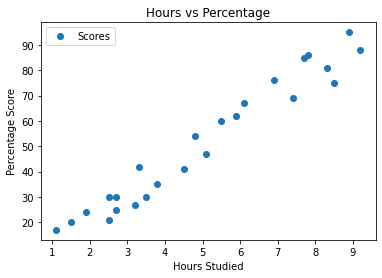

In [17]:
# Plotting the distribution of scores
font1 = {'family':'Calibri','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
sample_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### PreProcessing Data

In [18]:
x = sample_data.iloc[:, :-1].values  
y = sample_data.iloc[:, 1].values 

#### Splitting Data and Training Algorithm

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('Splitting complete.')

regressor = LinearRegression()  
regressor.fit(x_train.reshape(-1,1), y_train) 
print("Training complete.")

Splitting complete.
Training complete.


#### Visualizing the best fit Line of Regression

Intercept value is: 2.0181600414346974
Linear coefficient is: [9.91065648]


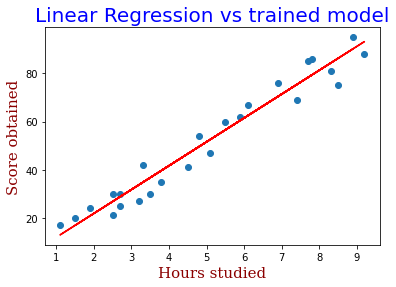

In [20]:
# Plotting the regression line
print('Intercept value is:',regressor.intercept_)
print('Linear coefficient is:',regressor.coef_)
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.title('Linear Regression vs trained model',fontdict=font1)
plt.xlabel('Hours studied',fontdict=font2)
plt.ylabel('Score obtained',fontdict=font2)
plt.plot(x, line,color='red');
plt.show()

In [21]:
print("Training Score: ",regressor.score(x_train,y_train)*100)

Training Score:  95.15510725211553


#### Predicting Data

In [22]:
# Testing data
print(x_test) # In Hours
# Model Prediction 
y_pred = regressor.predict(x_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


#### Comparison between actual result and predicted result

In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference/Error': y_test - y_pred})
df

,Actual,Predicted,Difference/Error
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [24]:
#Estimating training and test score
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


c:\users\jeets\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\jeets\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

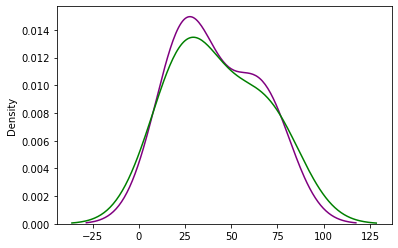

In [25]:
#Comparing the actual and predicted value through visualization
sns.distplot(y_test,hist=False,color="purple",label="actual")
sns.distplot(y_pred,hist=False,color="green",label="Predicted")

#### Application as per Requirements

In [26]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
pred = regressor.predict(test)
print("Score obtained by the student if he studies for 9.25 hours/day = {}".format(pred[0]))

Score obtained by the student if he studies for 9.25 hours/day = 93.69173248737535


#### Evaluating the Data

In [27]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) # Mean_absolute_error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # Mean_squared_error ( MSE Value)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Mean_squared_error ( RMSE Value)
print('R-2:', metrics.r2_score(y_test, y_pred)) #R2_Score
print("Slope of regression line ",regressor.coef_)
print("Y intercept of regression line",regressor.intercept_)

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355
Slope of regression line  [9.91065648]
Y intercept of regression line 2.0181600414346974


### Conclusion

I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.

#### Thank You